In [2]:
import numpy as np
import matplotlib.pyplot as plt

2. The nonlinear pendulum is governed by the equations
$$ \frac{dv}{dt} = -g sin(\theta) \quad \frac{d\theta}{dt} = \frac{v}{L}$$
Solve using a) forward Euler and b) backward Euler for $L=9$ meters, $\Delta t = 0.1$ seconds, $v_0 = 0.6$ meters/second and $\theta_0 = 0$. Integrate for 25 seconds and plot $v$ as a function of $t$. Comment on your results. Note that if a scheme is implicit, you may have to iterate to convergence at each time step. Use your own judgement on how best to do this.

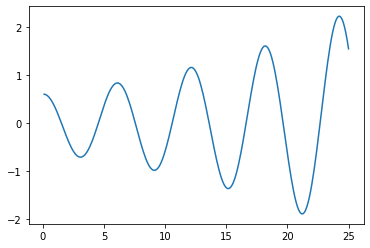

In [50]:
# Forward Euler
L = 9
g = 9.81 # provided this pendulum is on earth
def eulerStep (V, Theta, h):
    newV = V - h*g*(np.sin(Theta))
    newTheta = Theta + h*(V/L)
    return(newV, newTheta)

Vvals = []
Thetavals = []
Times = []
def fwdEuler (num):
    h = 0.1
    V = 0.6
    Theta = 0
    t = 0
    while t < num:
        (V,Theta) = eulerStep(V,Theta,h)
        Vvals.append(V)
        Thetavals.append(Theta)
        t = t + h
        Times.append(t)

fwdEuler(25)
plt.plot(Times, Vvals)

To compute backward euler we'll need the following formula:
Letting $f(x_{n},t_n) = \frac{x_n - x_{n-1}}{h}$ instead of $\frac{x_{n+1}-x_n}{h}$ we get $x_n = x_{n-1} + h f(x_n,t_n)$, an implicit formula. We're going to need to use a root finding method, given that this formula is implicit. I'll use newton raphson, as it converges quite fast.

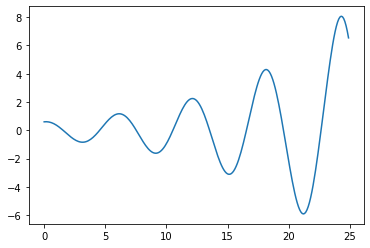

In [45]:
def findRootNR(x0, v, theta, h, steps):
    def F(x): #function we need to find the root of to know f(x_n+1)
        return x - g*h*np.sin(theta + h*x/L) - v
    def dF(x):
        return 1 - (g/L)*(h**2)*np.cos(theta + h*x/L)
    x = x0
    while (abs(F(x)) > 0.0001):
        if steps == 0:
            break
        else:
            x = x - F(x)/dF(x)
            steps = steps-1 #in case convergence is super slow or something
    return x

def findOtherRootNR(x0, v, theta, h, steps):
    def G(x):
        return x + (h/L)*(v - h*g*np.sin(x)) - theta
    def dG(x):
        return 1 - (g/L)*(h**2)*np.cos(x)
    x = x0
    while (abs(G(x)) > 0.0001):
        if steps == 0:
            break
        else:
            x = x - G(x)/dG(x)
            steps = steps-1
    return x


Vvals2 = [0.6]
Times = [0]
def bwdEuler (num, stepSize):
    V,Theta,t = 0.6,0,0
    for n in range(num-1) :
        V = findRootNR(V,V,Theta,stepSize,10)
        Theta = findOtherRootNR(Theta,V,Theta, stepSize,10)
        Vvals2.append(V)
        t = t+stepSize
        Times.append(t)
        #print(Theta, V)
        
bwdEuler(250, 0.1)
plt.plot(Times,Vvals2)

In both cases we see that the euler methods are unstable for solving this system. The backward euler method is even less stable and requires a lot more code to run it, so backward euler is just kinda bad. Neither of them are very good though. However if we reduce step size by a factor of 10, we see the numerical solution is a little bit less terrible:

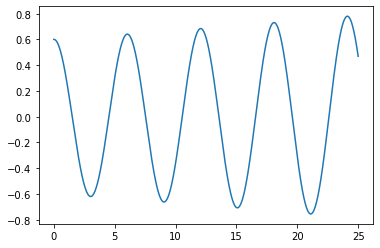

In [52]:
Vvals2 = [0.6]
Times = [0]
bwdEuler(2500,0.01)
plt.plot(S/100,Vvals2)

Numerical solutions to this system will all be unstable, but as step size $\to 0$ we get the analytical solution which is simply an osscilation of constant amplitude equal to the inieial velocity 0.6. 